# Instalação de pacotes

In [25]:
!pip install -r ../requirements.txt

# Importando as bibliotecas

In [6]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from keras.models import Sequential
from keras.layers import Dense,LSTM, GRU, Dropout

2024-08-12 18:20:19.399052: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-12 18:20:19.414471: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-12 18:20:19.556016: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-12 18:20:19.706787: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-12 18:20:19.833546: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

# Carregamento dos dados

In [7]:
# Ticket
petr = "PETR4.SA"

# Carregando a base de dados
petr_dataset = yf.download(petr, start='2018-01-01', end='2024-01-01')
petr_dataset

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,16.190001,16.549999,16.190001,16.549999,5.463502,33461800
2018-01-03,16.490000,16.719999,16.370001,16.700001,5.513021,55940900
2018-01-04,16.780001,16.959999,16.620001,16.730000,5.522924,37064900
2018-01-05,16.700001,16.860001,16.570000,16.830000,5.555938,26958200
2018-01-08,16.740000,17.030001,16.709999,17.030001,5.621960,28400000
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,32.968967,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,33.286068,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,33.820606,23466800


In [8]:
# Informações do dataset
petr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1487 entries, 2018-01-02 to 2023-12-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1487 non-null   float64
 1   High       1487 non-null   float64
 2   Low        1487 non-null   float64
 3   Close      1487 non-null   float64
 4   Adj Close  1487 non-null   float64
 5   Volume     1487 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 81.3 KB


# Análise Exploratória

In [9]:
# Descrição estatística
petr_dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1.487000e+03
mean,26.315535,26.713141,25.903470,26.307714,12.585153,6.893060e+07
std,4.897382,4.921409,4.885467,4.914609,6.670175,3.564862e+07
min,11.070000,12.180000,10.850000,11.290000,4.017226,0.000000e+00
25%,23.049999,23.370000,22.675000,22.969999,8.173494,4.650320e+07
50%,26.690001,27.020000,26.260000,26.700001,9.937624,6.059490e+07
75%,29.500000,29.850000,29.070000,29.474999,15.979719,8.221000e+07
max,38.689999,38.860001,37.919998,38.520000,33.847778,4.902304e+08


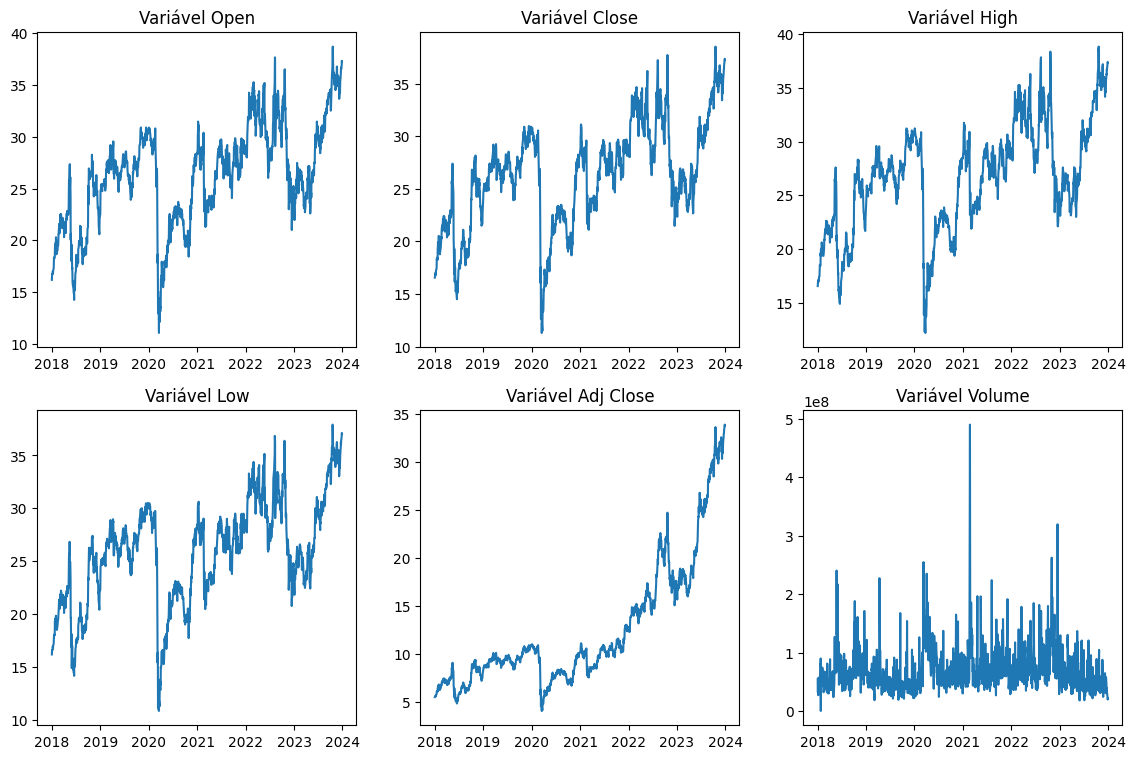

In [10]:
# Gráfico de linhas 
# Cria gráficos na matriz de 2x3
fig, axis = plt.subplots(2, 3, figsize=(14, 9))

# Exemplo de plot no primeiro subplot
axis[0, 0].plot(petr_dataset['Open'])
axis[0, 0].set_title('Variável Open')

axis[0, 1].plot(petr_dataset['Close'])
axis[0, 1].set_title('Variável Close')

axis[0, 2].plot(petr_dataset['High'])
axis[0, 2].set_title('Variável High')

axis[1, 0].plot(petr_dataset['Low'])
axis[1, 0].set_title('Variável Low')

axis[1, 1].plot(petr_dataset['Adj Close'])
axis[1, 1].set_title('Variável Adj Close')

axis[1, 2].plot(petr_dataset['Volume'])
axis[1, 2].set_title('Variável Volume')

# Salva o gráfico
#plt.savefig('distribuicao_acao_png')

# Exibe os gráficos
plt.show()

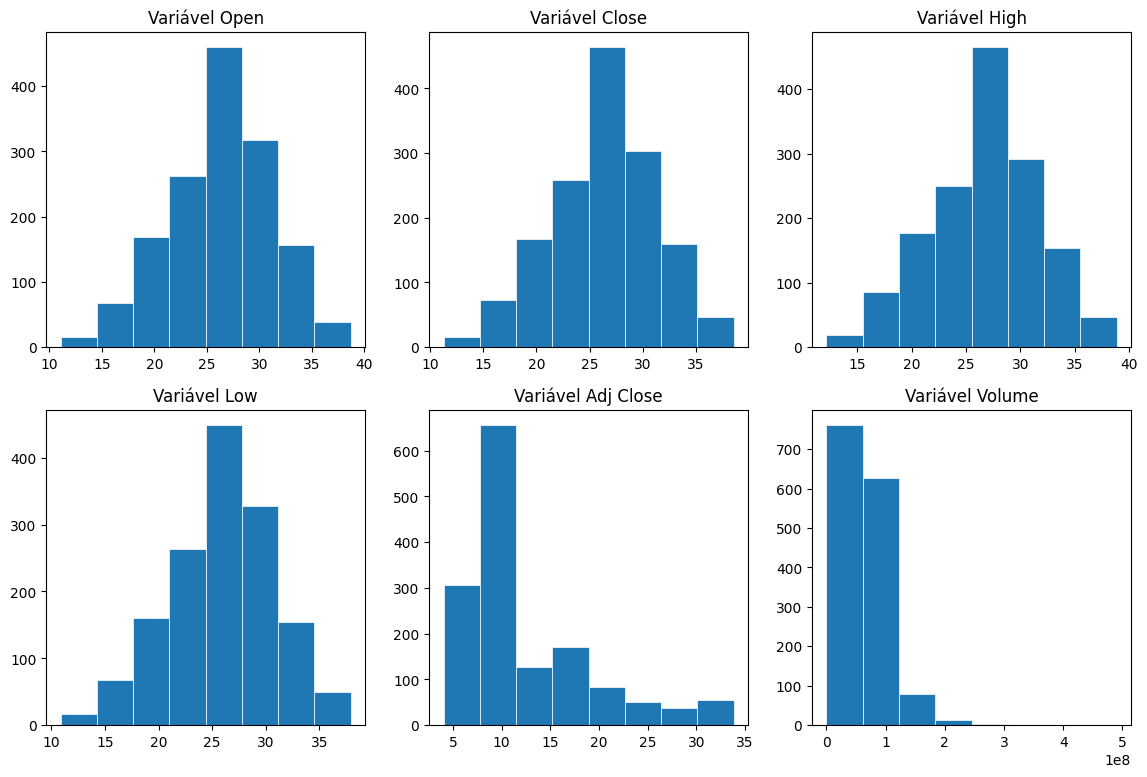

In [11]:
# Gráfico de Distruição 
# Cria gráficos na matriz de 2x3
fig, axis = plt.subplots(2, 3, figsize=(14, 9))

# Exemplo de plot no primeiro subplot
axis[0, 0].hist(petr_dataset['Open'], bins=8, linewidth=0.5, edgecolor="white")
axis[0, 0].set_title('Variável Open')

axis[0, 1].hist(petr_dataset['Close'], bins=8, linewidth=0.5, edgecolor="white")
axis[0, 1].set_title('Variável Close')

axis[0, 2].hist(petr_dataset['High'], bins=8, linewidth=0.5, edgecolor="white")
axis[0, 2].set_title('Variável High')

axis[1, 0].hist(petr_dataset['Low'], bins=8, linewidth=0.5, edgecolor="white")
axis[1, 0].set_title('Variável Low')

axis[1, 1].hist(petr_dataset['Adj Close'], bins=8, linewidth=0.5, edgecolor="white")
axis[1, 1].set_title('Variável Adj Close')

axis[1, 2].hist(petr_dataset['Volume'], bins=8, linewidth=0.5, edgecolor="white")
axis[1, 2].set_title('Variável Volume')

# Salva o gráfico
#plt.savefig('distribuicao_acao_png')

# Exibe os gráficos
plt.show()

In [12]:
# Verificando a correlação dos dados
petr_dataset.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.997513,0.996754,0.993929,0.721624,-0.122082
High,0.997513,1.000000,0.996276,0.997018,0.726414,-0.095913
Low,0.996754,0.996276,1.000000,0.997466,0.722059,-0.156768
Close,0.993929,0.997018,0.997466,1.000000,0.726594,-0.128972
Adj Close,0.721624,0.726414,0.722059,0.726594,1.000000,-0.088359
Volume,-0.122082,-0.095913,-0.156768,-0.128972,-0.088359,1.000000


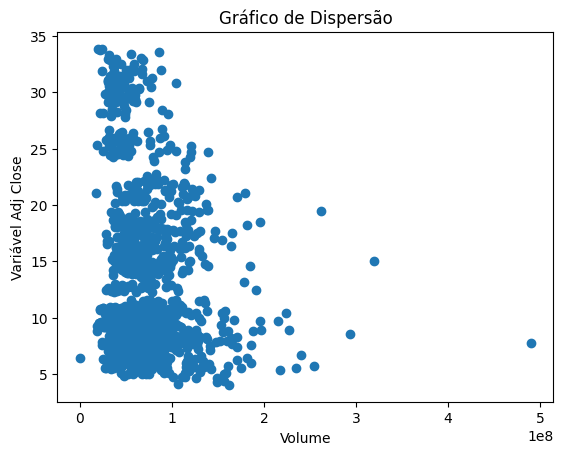

In [13]:
# Gráfico de dispersão
plt.scatter(petr_dataset['Volume'], petr_dataset['Adj Close'])
plt.xlabel('Volume')
plt.ylabel("Variável Adj Close")
plt.title("Gráfico de Dispersão")
plt.plot();

## Decomposição da série

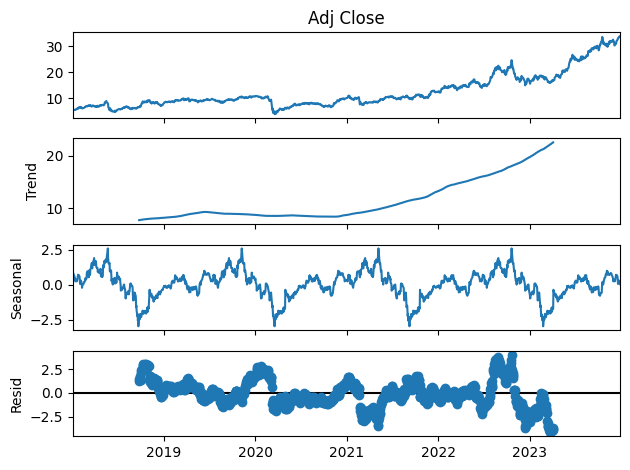

In [14]:
decomposition_serie = seasonal_decompose(petr_dataset['Adj Close'], model='additive', period=365)  # decomposição anual
decomposition_serie.plot()
plt.show()

## Extraindo a variável alvo

In [15]:
# Séria Temporal
serie_temporal_ = pd.DataFrame(petr_dataset['Adj Close'])
serie_temporal_.reset_index('Date', inplace=True)
serie_temporal_.head()
#len(serie_temporal) * 0.1

,Date,Adj Close
0,2018-01-02,5.463502
1,2018-01-03,5.513021
2,2018-01-04,5.522924
3,2018-01-05,5.555938
4,2018-01-08,5.621960


## Baseline do modelo

In [16]:
# Pegando a coluna alvo
serie_temporal = serie_temporal_['Adj Close']

# média moóvel
media_movel = serie_temporal.rolling(window=20).mean()
media_movel[19:]

19       5.896456
20       5.944984
21       5.994502
22       6.057060
23       6.108889
          ...    
1482    31.818816
1483    31.885406
1484    31.987783
1485    32.067510
1486    32.158563
Name: Adj Close, Length: 1468, dtype: float64

# Pré-processamento

In [17]:
# Função para dividir os datasets em treino e teste com
def split_dataset(time_serie_x, time_serie_y, porc_train):
  """
  time_serie_x: Dados preditores
  time_serie_y: Dados alvos
  porc_train: Porcentagem de dados de treinamento
  """

  # tamanho dos datasets
  tam = len(time_serie_x)

  # 80% dos dados serão de treinamento e 20% serão pra teste (exemplo)
  ponto_separacao = int(tam * porc_train)

  # treino e teste
  time_serie_train_x, time_serie_train_y = time_serie_x[0:ponto_separacao], time_serie_y[0:ponto_separacao]
  time_serie_test_x, time_serie_test_y = time_serie_x[ponto_separacao:], time_serie_y[ponto_separacao:]

  # Retorna os arrays de treino e teste
  return time_serie_train_x, time_serie_test_x, time_serie_train_y, time_serie_test_y

In [18]:
# Função para criar as janelas
def n_janelas(time_serie, janela: int):
  # Dados de treino e resposta do treino que serão preenchidos
  treino = []
  resposta = []

  # Coloca n valores no treino e o próximo na resposta
  for i in range(janela, len(time_serie)):
    treino.append(time_serie[i - janela:i])
    resposta.append(time_serie[i])

  return treino, resposta

## Baseline

In [19]:
# Número de dias da janela
janela = 20 

# Ponto de separação dos dados de treino e teste: 90/10
ponto_separacao = int(len(serie_temporal) * 0.9)  # 148 para os dados de teste

# Dados para o treinamento e teste
serie_temporal_x, serie_temporal_y = np.array(serie_temporal)[0:ponto_separacao], np.array(serie_temporal[ponto_separacao:])

# separando os dados em em janela de 20 dias
treino, resposta = n_janelas(serie_temporal_x, janela)

## Pré-processamento dos outros modelos

In [20]:
# Número de dias da janela
janela = 20 

# Pegando a coluna alvo
serie_temporal = serie_temporal_['Adj Close']

# Ponto de separação dos dados de treino e teste: 90/10
ponto_separacao = int(len(serie_temporal) * 0.9)  # 148 para os dados de teste

# Dados para o treinamento e teste
serie_temporal_x, serie_temporal_y = np.array(serie_temporal[0:ponto_separacao]), np.array(serie_temporal[ponto_separacao:])

# separando os dados em janela de 20 dias
treino, resposta = n_janelas(serie_temporal_x, janela)

# Dados de treinamento e validação
petr_treino_x, petr_val_x, petr_treino_y, petr_val_y = split_dataset(np.array(treino), np.array(resposta), 0.9)

In [21]:
petr_treino_x = np.array(petr_treino_x)
petr_treino_y = np.array(petr_treino_y)
petr_val_x = np.array(petr_val_x)
petr_val_y = np.array(petr_val_y)

-----------------------------------------------------

In [22]:
# Número de dias da janela
janela = 20 

# Pegando a coluna alvo
serie_temporal = serie_temporal_['Adj Close']

# Ponto de separação dos dados de treino e teste: 90/10
ponto_separacao = int(len(serie_temporal) * 0.9)  # 148 para os dados de teste

# Dados para o treinamento e teste
serie_temporal_x, serie_temporal_y = np.array(serie_temporal[0:ponto_separacao]), np.array(serie_temporal[ponto_separacao:])

# Pegando o valor de referência 
valor_referencia = serie_temporal_x[-1]

# Diferenciando a base de dados (valor_atual - valor_anterior)
serie_temporal_x_diff = np.diff(serie_temporal_x)

# separando os dados em janela de 20 dias
treino, resposta = n_janelas(serie_temporal_x_diff, janela)

# Dados de treinamento e validação
petr_treino_x, petr_val_x, petr_treino_y, petr_val_y = split_dataset(treino, resposta, 0.9)

# Treinamento do modelo

In [23]:
# Criação do modelo
petr_mlp = Sequential()

# adicionando as camadas ocultas
petr_mlp.add(Dense(units=10, activation='relu', input_shape=(20, )))

#bb_mlp_5.add(Dense(units=20, activation='relu'))

# Camada de saída
petr_mlp.add(Dense(units=1))

# Compilar o modelo
petr_mlp.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Treinamento do modelo
history = petr_mlp.fit(petr_treino_x, petr_treino_y, epochs=10, batch_size=4, validation_data=(petr_val_x, petr_val_y))

/home/miguel/Documents/ai_libraries/ai_libraries/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


IndexError: tuple index out of range

In [ ]:
# Resumo do modelo
petr_mlp.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 665 (2.60 KB)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 444 (1.74 KB)

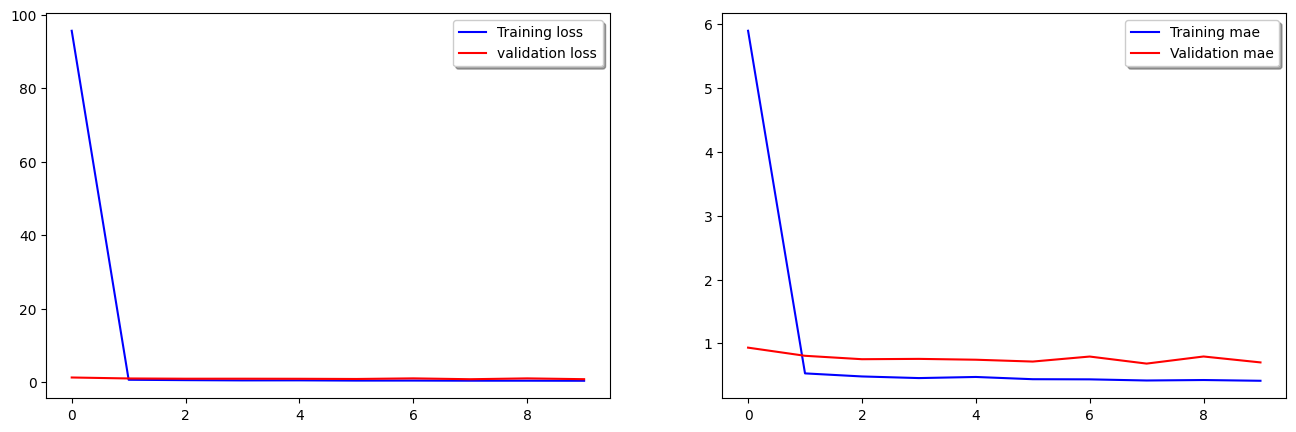

In [ ]:
# 2 gráficos em um
fig, ax = plt.subplots(1,2, figsize=(16,5))

# 1º gráfico
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss")
legend = ax[0].legend(loc='best', shadow=True)

# 2º gráfico
ax[1].plot(history.history['mae'], color='b', label="Training mae")
ax[1].plot(history.history['val_mae'], color='r',label="Validation mae")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
# Fazendo as previsões

# Avaliação do modelo

In [ ]:
# Função para avaliar o erro
def avaliar_modelo(data_test, forecast):
  """
  data_test: Os dados originais
  forecast: Os dados de previsão
  """

  RMSE = np.sqrt( mean_squared_error(data_test, forecast) )
  MAPE = mean_absolute_percentage_error(data_test, forecast) * 100
  R_2 = r2_score(data_test, forecast) * 100

  print(f'RMSE: {RMSE:0.3f}')
  print(f'MAPE: {MAPE:0.3f}%')
  print(f'R²: {R_2:0.3f}%')

In [ ]:
# Função para plotar um gráfico
def plot_resultados(data_train, data_test, forecast, save=False, title_plot=' ', title=' ', figsize=(8,6)):
  """
  data_train: Dados de treino
  data_test: Dados de teste
  forecast: Dados de previsão
  save: Salvar o gráfico, por padrão é False
  title_plot: Caso o parâmetro save for igual a True então o title_plot será o nome do arquivo
  title: Título do gráfico, por padrão é um espaço vazio
  figsize: Tamanho da visualização, por padrão é (8,6)
  """

  # Cria o gráfico
  plt.figure(figsize=figsize)

  # Plotando os dados de treino
  plt.plot(np.arange(len(data_train)), data_train, label='Dados de treino')

  # Plotando os dados de teste e as previsões
  plt.plot(np.arange(len(data_train), len(data_train) + len(data_test)), data_test, label='Dados de teste')
  plt.plot(np.arange(len(data_train), len(data_train) + len(data_test)), forecast, label='Previsão')

  # Adiciona o título caso tenha
  if title != ' ':
    plt.title(title)

  # Legenda
  plt.legend()

  # Salva o gráfico
  if save == True:
    plt.savefig(title_plot)

  # Exibe o gráfico
  plt.show()

## Avaliação - Baseline

In [ ]:
media_movel_teste = np.array(media_movel)[ponto_separacao:]
len(serie_temporal_y), len(media_movel_teste)

(149, 149)

In [ ]:
avaliar_modelo(serie_temporal_y, media_movel_teste)

RMSE: 1.352
MAPE: 3.898%
R²: 83.367%


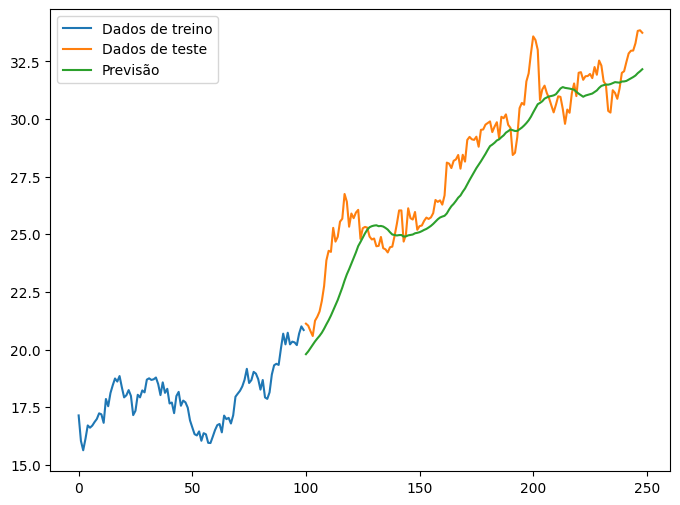

In [ ]:
plot_resultados(serie_temporal_x[ponto_separacao-100:], serie_temporal_y, media_movel_teste, 
                title_plot='Avaliação do modelo de média móvel 20 dias')

## Avaliando o modelo MLP